# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

In [124]:
import pandas as pd
import numpy as np
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['scatter']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [2]:
# downloading world firearm ownership and murders
!curl -O https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW9_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7852  100  7852    0     0  57401      0 --:--:-- --:--:-- --:--:-- 57735


In [31]:
firearms = pd.read_csv('World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv', sep=',')
firearms.columns

Index(['Country/Territory', 'ISO code', 'Source', '% of homicides by firearm',
       'Number of homicides by firearm',
       'Homicide by firearm rate per 100,000 pop', 'Rank by rate of ownership',
       'Average firearms per 100 people',
       'Average total all civilian firearms'],
      dtype='object')

In [42]:
firearms2 = firearms.drop(['ISO code', 'Source', 'Rank by rate of ownership',
                          '% of homicides by firearm', 'Homicide by firearm rate per 100,000 pop',
                          'Average firearms per 100 people'], axis=1)
firearms2.head()

,Country/Territory,Number of homicides by firearm,Average total all civilian firearms
0,Albania,56.0,270000.0
1,Algeria,20.0,1900000.0
2,Angola,NaN,2800000.0
3,Anguilla,1.0,NaN
4,Argentina,1198.0,3950000.0


- **To access gun ownership vs mass shooting data**: https://datawrapper.dwcdn.net/pvLFI/6/
- Select "get the data" in bottom left hand corner
- Data downloads file named 'data-pvLFI.csv'

In [4]:
gun_owners = pd.read_csv('data-pvLFI.csv')
gun_owners.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


- **To access population data**: https://data.worldbank.org/indicator/SP.POP.TOTL
- Select 'CSV' under the data section
- Data downloads zip file which contains file named 'API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv'

In [5]:
pop = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv', sep=',', header=2)
pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


In [43]:
pop2 = pop.filter(['Country Name', '2012'])
pop2.head()

,Country Name,2012
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


- **To access gdp data**: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?end=2013&start=2012
- Limit range of dates to 2012-2013
- Select 'CSV' under the data section
- Data downloads zip file which contains file named 'API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv'

In [12]:
## loading GDP data for 2012

gdp = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv', sep = ',', header = 2)
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


In [44]:
# selecting columns I want, much easier that df.drop since they're so many
gdp2 = gdp.filter(['Country Name', '2012'])
gdp2.head()

,Country Name,2012
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.139232e+11
3,Albania,1.231978e+10
4,Andorra,3.164615e+09


In [45]:
# merging population and firearm murders

firearm_pop = pd.merge(pop2, firearms2, left_on='Country Name', right_on='Country/Territory')
firearm_pop.head()

,Country Name,2012,Country/Territory,Number of homicides by firearm,Average total all civilian firearms
0,Angola,25096150.0,Angola,NaN,2800000.0
1,Albania,2900401.0,Albania,56.0,270000.0
2,United Arab Emirates,8900453.0,United Arab Emirates,NaN,1000000.0
3,Argentina,42096739.0,Argentina,1198.0,3950000.0
4,Armenia,2881922.0,Armenia,9.0,380000.0


In [46]:
# merging firearm/population with gun ownership and murders

fire_guns_pop = pd.merge(firearm_pop, gun_owners, left_on='Country Name', right_on='Country')
fire_guns_pop.head()

,Country Name,2012,Country/Territory,Number of homicides by firearm,Average total all civilian firearms,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,22742475.0,Australia,30.0,3050000.0,Australia,15.0,4
1,Austria,8429991.0,Austria,18.0,2500000.0,Austria,30.4,1
2,Belgium,11128246.0,Belgium,70.0,1800000.0,Belgium,17.2,2
3,Canada,34750545.0,Canada,173.0,9950000.0,Canada,30.8,4
4,Switzerland,7996861.0,Switzerland,57.0,3400000.0,Switzerland,45.7,2


In [49]:
final = pd.merge(fire_guns_pop, gdp2, left_on = 'Country Name', right_on = 'Country Name')
final.head()

,Country Name,2012_x,Country/Territory,Number of homicides by firearm,Average total all civilian firearms,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),2012_y
0,Australia,22742475.0,Australia,30.0,3050000.0,Australia,15.0,4,1.543411e+12
1,Austria,8429991.0,Austria,18.0,2500000.0,Austria,30.4,1,4.094252e+11
2,Belgium,11128246.0,Belgium,70.0,1800000.0,Belgium,17.2,2,4.978842e+11
3,Canada,34750545.0,Canada,173.0,9950000.0,Canada,30.8,4,1.824289e+12
4,Switzerland,7996861.0,Switzerland,57.0,3400000.0,Switzerland,45.7,2,6.680436e+11


In [55]:
# reducing df to columns i want - could also have used drop
final2 = final.filter(['Country Name', '2012_x', 'Number of homicides by firearm', 
                      'Average total all civilian firearms', 'Country', 'Guns per 100 inhabitants',
                      'Number of mass shootings (1983-2013)', '2012_y'])

In [54]:
# renaming columns to proper indicators
final_ = final2.rename(index = str, columns = {'2012_x' : 'pop', '2012_y' : 'gdp'})

,Country Name,pop,Number of homicides by firearm,Average total all civilian firearms,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),gdp
0,Australia,22742475.0,30.0,3050000.0,Australia,15.0,4,1.543411e+12
1,Austria,8429991.0,18.0,2500000.0,Austria,30.4,1,4.094252e+11
2,Belgium,11128246.0,70.0,1800000.0,Belgium,17.2,2,4.978842e+11
3,Canada,34750545.0,173.0,9950000.0,Canada,30.8,4,1.824289e+12
4,Switzerland,7996861.0,57.0,3400000.0,Switzerland,45.7,2,6.680436e+11


In [65]:
# reordering columns to match FBBs
final_ = final_[['Country Name', 'Average total all civilian firearms', 'pop', 'gdp',
                'Number of homicides by firearm', 'Country', 'Guns per 100 inhabitants',
                'Number of mass shootings (1983-2013)']]

In [68]:
final_ = final_.rename(index = str, columns = {'Number of mass shootings (1983-2013)' : 'Number of mass shootings'})
final_.head()

,Country Name,Average total all civilian firearms,pop,gdp,Number of homicides by firearm,Country,Guns per 100 inhabitants,Number of mass shootings
0,Australia,3050000.0,22742475.0,1.543411e+12,30.0,Australia,15.0,4
1,Austria,2500000.0,8429991.0,4.094252e+11,18.0,Austria,30.4,1
2,Belgium,1800000.0,11128246.0,4.978842e+11,70.0,Belgium,17.2,2
3,Canada,9950000.0,34750545.0,1.824289e+12,173.0,Canada,30.8,4
4,Switzerland,3400000.0,7996861.0,6.680436e+11,57.0,Switzerland,45.7,2


In [93]:
final_

,Country Name,Average total all civilian firearms,pop,gdp,Number of homicides by firearm,Country,Guns per 100 inhabitants,Number of mass shootings,gdp per person,firearms_pp
0,Australia,3050000.0,22742475.0,1.543411e+12,30.0,Australia,15.0,4,67864.689862,134.110294
1,Austria,2500000.0,8429991.0,4.094252e+11,18.0,Austria,30.4,1,48567.695286,296.560222
2,Belgium,1800000.0,11128246.0,4.978842e+11,70.0,Belgium,17.2,2,44740.583248,161.750558
3,Canada,9950000.0,34750545.0,1.824289e+12,173.0,Canada,30.8,4,52496.694870,286.326445
4,Switzerland,3400000.0,7996861.0,6.680436e+11,57.0,Switzerland,45.7,2,83538.230078,425.166825
5,Germany,25000000.0,80425823.0,3.543984e+12,158.0,Germany,30.3,7,44065.248908,310.845436
6,Denmark,650000.0,5591572.0,3.271489e+11,15.0,Denmark,12.0,0,58507.500210,116.246379
7,Spain,4500000.0,46773055.0,1.336019e+12,90.0,Spain,10.4,1,28563.859038,96.209238
8,Finland,2400000.0,5413971.0,2.567065e+11,24.0,Finland,45.3,2,47415.559871,443.297535
9,France,19000000.0,65659789.0,2.683825e+12,35.0,France,31.2,6,40874.715956,289.370409


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


In [79]:
## first adding column for gdp per person

final_['gdp per person'] = final_['gdp'] / final_['pop']

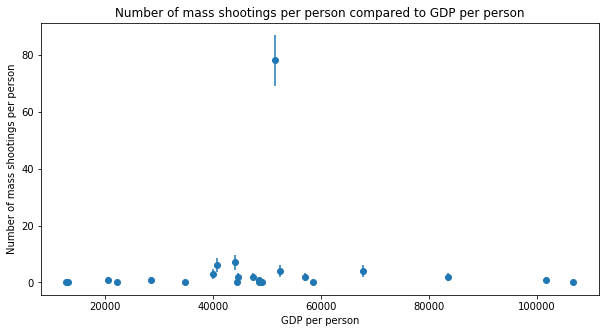

Number of mass shootings vs GDP per person, the errors represent Poisson statistics.
The datapoint at the top of the plot is the USA, which has an extremely large number of mass shootings per person 
compared to countries with similar GDP per person.


In [87]:
# PLOTTING MASS SHOTTING VS GDP PER PERSON
fig = pl.figure(figsize = (10,5))
ax = fig.add_subplot(111)

scatter = ax.scatter(final_['gdp per person'], final_['Number of mass shootings'])
ax.errorbar(final_['gdp per person'], final_['Number of mass shootings'],
            yerr = np.sqrt(final_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel('GDP per person')
ax.set_ylabel('Number of mass shootings per person')
ax.set_ylim()
ax.set_title('Number of mass shootings per person compared to GDP per person')
plt.show()
print ("Number of mass shootings vs GDP per person, " + 
       "the errors represent Poisson statistics.\n" + 
       "The datapoint at the top of the plot is the USA, " + 
       "which has an extremely large number of mass shootings per person \n" +
       'compared to countries with similar GDP per person.')

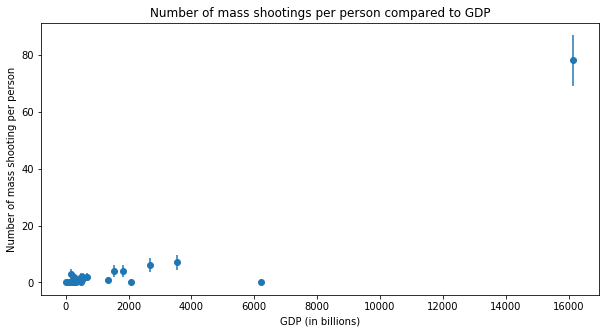

Number of mass shootings vs GDP, the errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


In [76]:
# PLOTTING MASS SHOTTING VS GDP (absolute values)
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(final_.gdp / 1e9, final_['Number of mass shootings'])
ax.errorbar(final_.gdp / 1e9, final_['Number of mass shootings'], 
            yerr = np.sqrt(final_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
ax.set_title('Number of mass shootings per person compared to absolute GDP')
plt.show()
print ("Number of mass shootings vs GDP, " + 
       "the errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")


## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [91]:
## creating new columns of average # of fire arms per person

final_['firearms_pp'] = final_["Average total all civilian firearms"] / final_['pop'] * 1e3

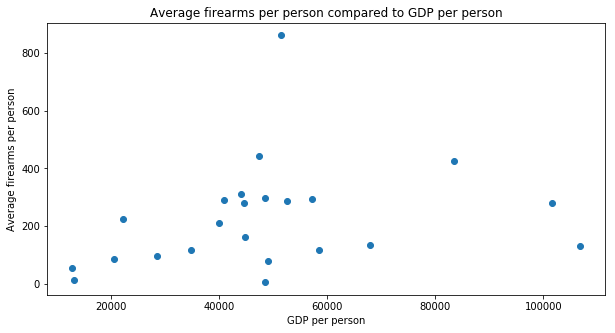

Average firearms per person vs GDP per person.
The datapoint at the top of the plot is the USA, which has a much larger average number of firearms per person 
compared to countries with similar GDP per person.


In [98]:
# PLOTTING avg numnber of civilian fire arms per person VS GDP per person
# No errrors 
fig = pl.figure(figsize = (10,5))
ax = fig.add_subplot(111)

scatter = ax.scatter(final_['gdp per person'], final_['firearms_pp'])
ax.set_xlabel('GDP per person')
ax.set_ylabel('Average firearms per person')
ax.set_ylim()
ax.set_title('Average firearms per person compared to GDP per person')
plt.show()
print ("Average firearms per person vs GDP per person.\n" + 
       "The datapoint at the top of the plot is the USA, " + 
       "which has a much larger average number of firearms per person \n" +
       'compared to countries with similar GDP per person.')



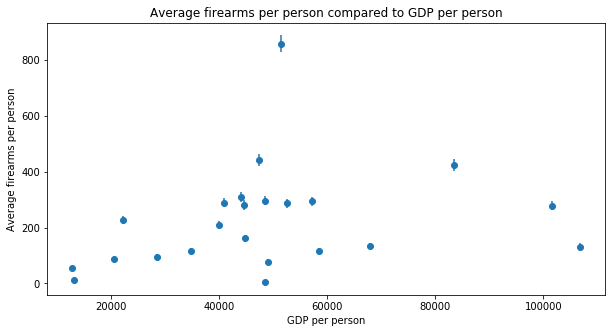

Average firearms per person vs GDP per person, the errors represent Poisson statistics.
The datapoint at the top of the plot is the USA, which has a much large number of firearms per person 
compared to countries with similar GDP per person.


In [97]:
# PLOTTING avg numnber of civilian fire arms per person VS GDP per person
# With errrors 
fig = pl.figure(figsize = (10,5))
ax = fig.add_subplot(111)

scatter = ax.scatter(final_['gdp per person'], final_['firearms_pp'])
ax.errorbar(final_['gdp per person'], final_['firearms_pp'],
            yerr = np.sqrt(final_['firearms_pp'] * 1.0), fmt = '.')
ax.set_xlabel('GDP per person')
ax.set_ylabel('Average firearms per person')
ax.set_ylim()
ax.set_title('Average firearms per person compared to GDP per person')
plt.show()
print ("Average firearms per person vs GDP per person, " + 
       "the errors represent Poisson statistics.\n" + 
       "The datapoint at the top of the plot is the USA, " + 
       "which has a much large number of firearms per person \n" +
       'compared to countries with similar GDP per person.')


## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

Text(0,0.5,'frequency')

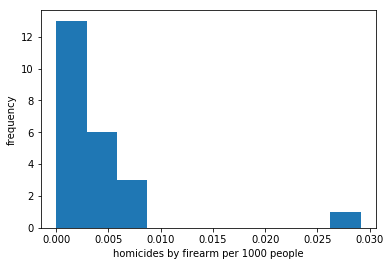

In [103]:
# histogram of average number of homicides by firearms per person

fig, ax = plt.subplots()
ax.hist(final_['Number of homicides by firearm'] / final_['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people')
ax.set_ylabel('frequency')


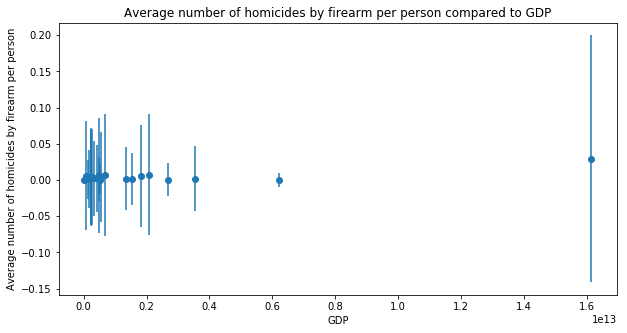

Average number of homicides by firearm per person vs GDP, the errors represent Poisson statistics.


In [108]:
# column for homicide by fire arm per person

final_['homicides_pp'] = final_['Number of homicides by firearm'] / final_['pop'] * 1000

# plotting avg number of homicides by firearms per person comapred to GDP with errors

fig = pl.figure(figsize = (10,5))
ax = fig.add_subplot(111)

scatter = ax.scatter(final_['gdp'], final_['homicides_pp'])
ax.errorbar(final_['gdp'], final_['homicides_pp'],
            yerr = np.sqrt(final_['homicides_pp'] * 1.0), fmt = '.')
ax.set_xlabel('GDP')
ax.set_ylabel('Average number of homicides by firearm per person')
ax.set_ylim()
ax.set_title('Average number of homicides by firearm per person compared to GDP')
plt.show()
print ("Average number of homicides by firearm per person vs GDP, " + 
       "the errors represent Poisson statistics.")

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


Text(0,0.5,'Number of homicides by firearm')

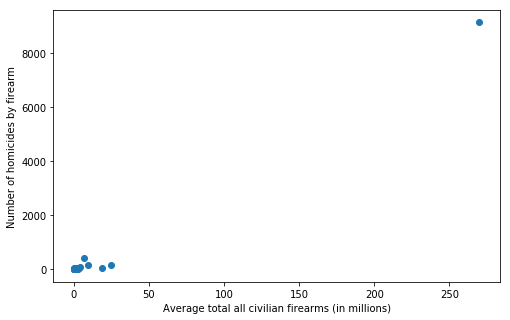

In [116]:
fig = pl.figure(figsize = (8,5))
ax = fig.add_subplot(111)

ax.scatter(final_['Average total all civilian firearms'] / 1e6, final_['Number of homicides by firearm'])
ax.set_xlabel('Average total all civilian firearms (in millions)')
ax.set_ylabel('Number of homicides by firearm')

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


Text(0.5,1,'Number of mass shootings vs average total all civilian firearms')

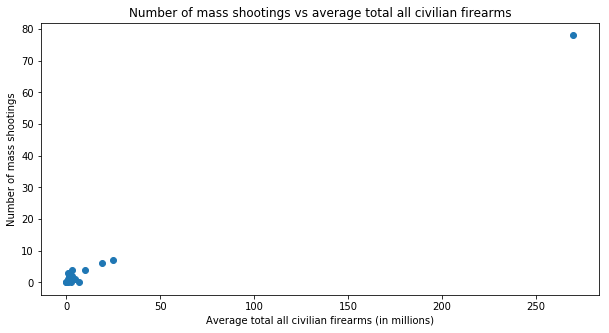

In [122]:
# y = Number of mass shootings
# x = Average total all civilian firearms
# without errors

fig = pl.figure(figsize = (10,5))
ax = fig.add_subplot(111)

ax.scatter(final_['Average total all civilian firearms'] / 1e6, final_['Number of mass shootings'])
ax.set_xlabel('Average total all civilian firearms (in millions)')
ax.set_ylabel('Number of mass shootings')
ax.set_title('Number of mass shootings vs average total all civilian firearms')

Text(0.5,1,'Number of mass shootings vs average total all civilian firearms')

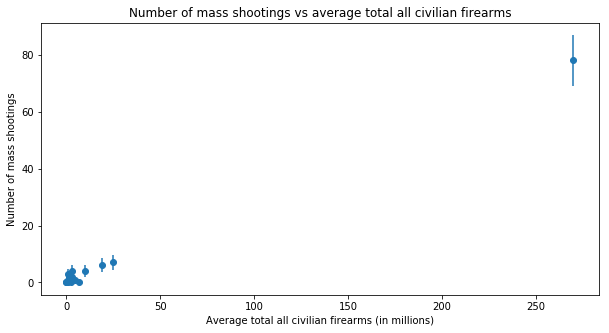

In [120]:
# y = Number of mass shootings
# x = Average total all civilian firearms
# wit errors

fig = pl.figure(figsize = (10,5))
ax = fig.add_subplot(111)

ax.scatter(final_['Average total all civilian firearms'] / 1e6, final_['Number of mass shootings'])
ax.errorbar(final_['Average total all civilian firearms'] / 1e6, final_['Number of mass shootings'],
            yerr = np.sqrt(final_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel('Average total all civilian firearms (in millions)')
ax.set_ylabel('Number of mass shootings')
ax.set_title('Number of mass shootings vs average total all civilian firearms')

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [125]:
final_['Number of mass shootings'].mean()

4.9565217391304346

In [126]:
final_['firearms_pp'].mean()

226.0159524542475

## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



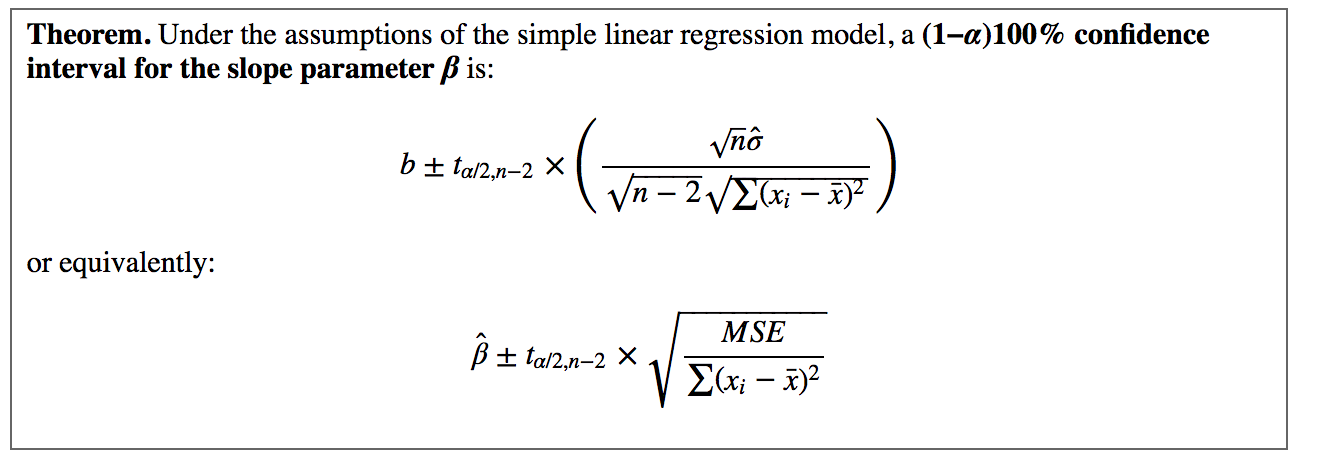

In [29]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

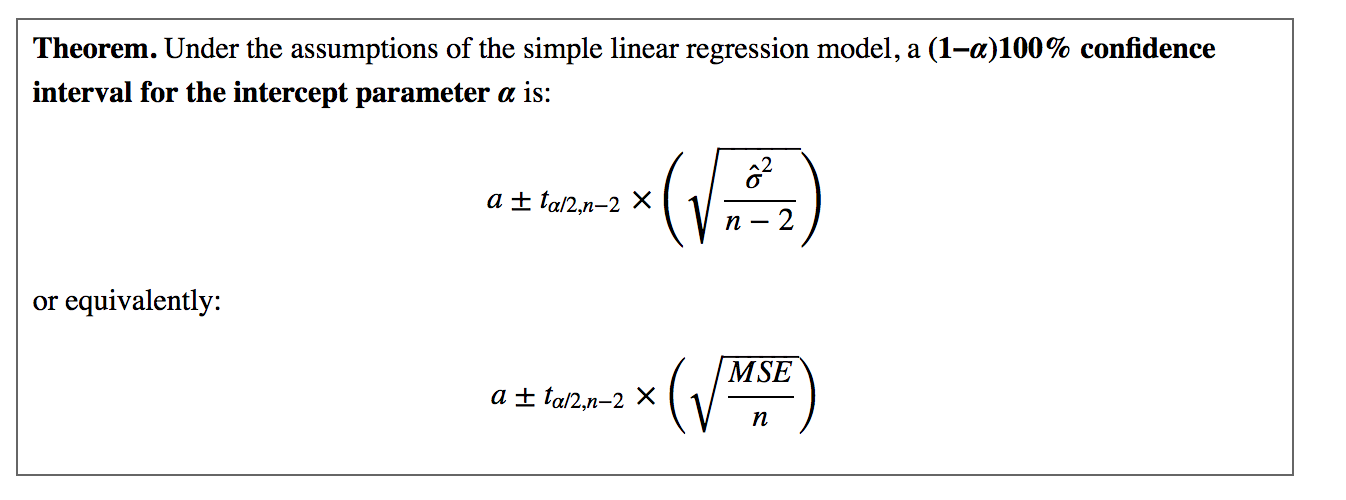

In [30]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

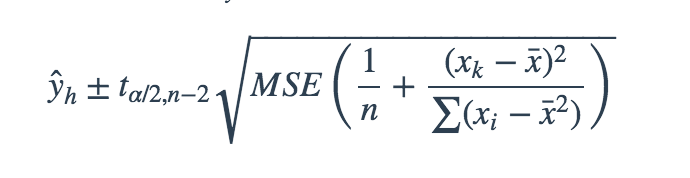

In [33]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

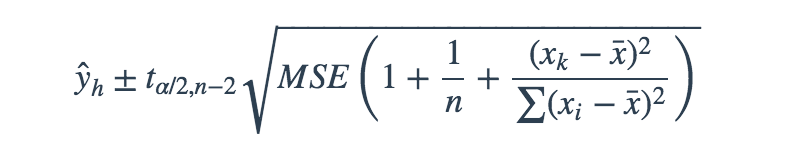

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

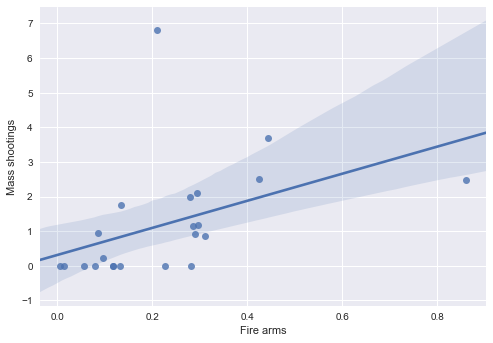

In [66]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

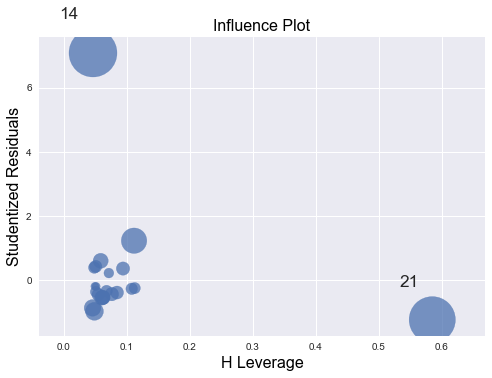

In [362]:
sm.graphics.influence_plot(modelOLS, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings